# CAS Data Engineering FHNW 
## Data Wrangling Module - Author F.Burnelli

# Visualisation:


### Dataset: LendingClub

In [20]:
import sys
import warnings

# Wrangling
import pandas as pd
import numpy as np

### Vis
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

## Extract Data

In [22]:
file_path = os.path.join("..","data", "dirty-loan-data.csv")
df = pd.read_csv(file_path,low_memory = False)
            

In [23]:
sns.set_style('darkgrid',{'axes.grid' : False})


## Palette: Sequential vs Divergent

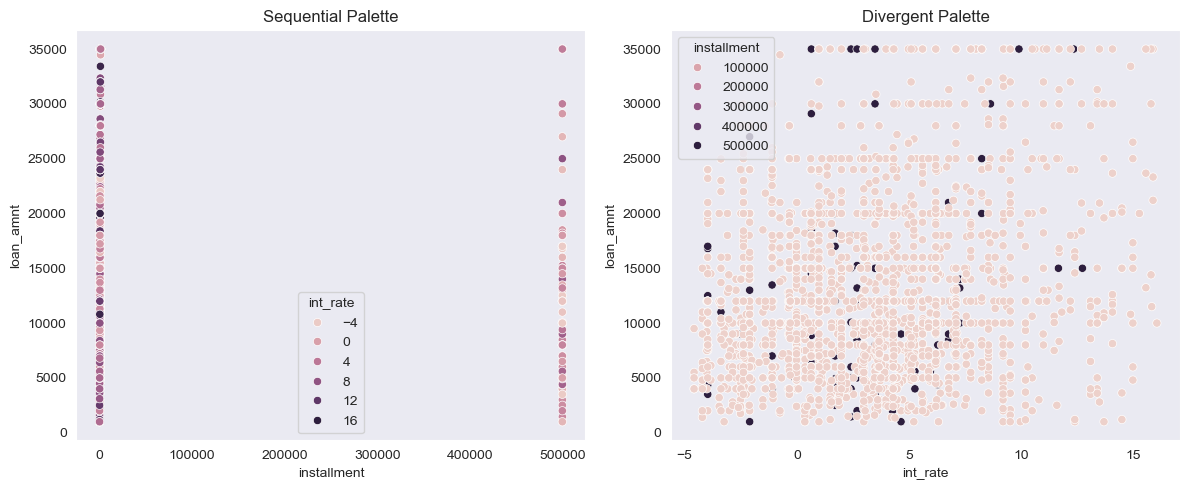

In [25]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Sequential palette example
sns.set_palette("Blues")
sns.scatterplot(x='installment', y='loan_amnt', hue='int_rate', data=df.head(2000), ax=axes[0])
axes[0].set_title('Sequential Palette')
# Divergent palette example
sns.set_palette("RdBu")
sns.scatterplot(x='int_rate',y="loan_amnt", hue="installment",data=df.head(2000), ax=axes[1])
axes[1].set_title('Divergent Palette')
plt.tight_layout()

plt.show()


# Categorical: grades

[Text(0.5, 1.0, 'Grades Count')]

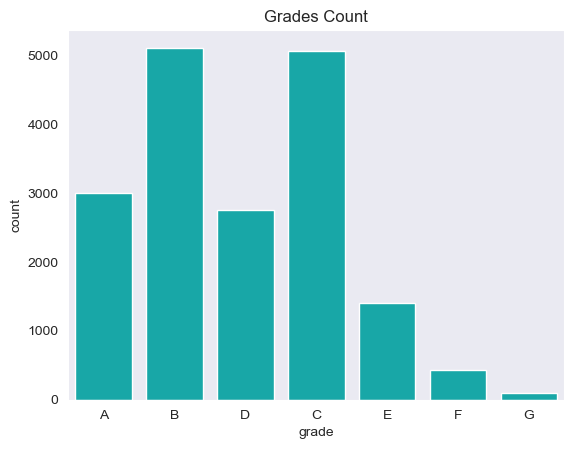

In [26]:
sns.countplot(data=df, x="grade", color="c").set(title='Grades Count')

# Grades and Terms

[Text(0.5, 1.0, 'Grades Count')]

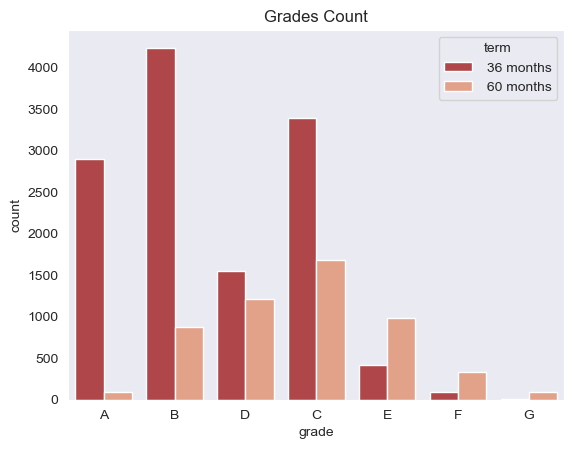

In [27]:
sns.countplot(data=df, x="grade", hue="term").set(title='Grades Count')

# Boxplot (CATPLOT)

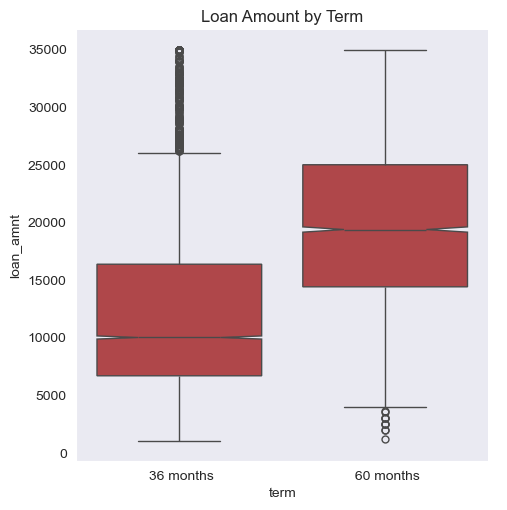

In [28]:
sns.catplot(data=df,x="term",y="loan_amnt",kind="box",
           whis=1,
           notch=True).set(title='Loan Amount by Term')

# Histograms

[Text(0.5, 1.0, 'Loans Amount 10')]

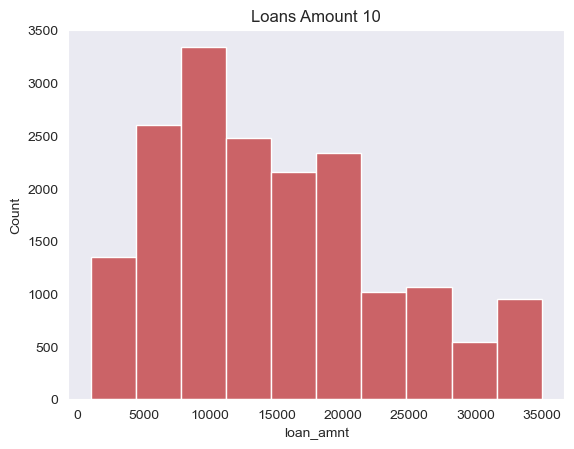

In [30]:
bins = 10
sns.histplot(data=df,x="loan_amnt",bins=bins).set(title=f'Loans Amount {bins}')

[Text(0.5, 1.0, 'Loans Amount [5000, 10000, 15000, 20000, 25000, 100000]')]

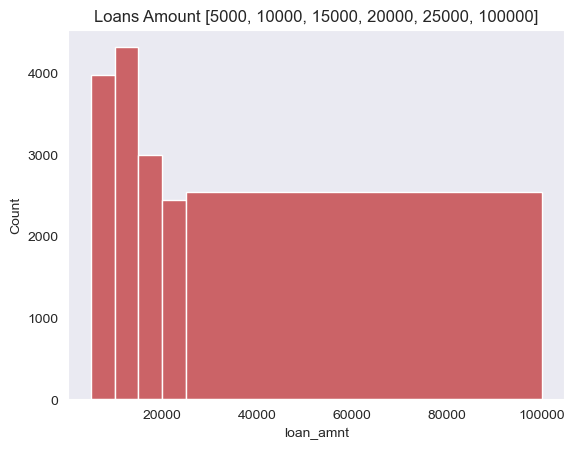

In [31]:
bins = [5000,10000,15000,20000,25000,100000]
sns.histplot(data=df,x="loan_amnt",bins=bins).set(title=f'Loans Amount {bins}')

[Text(0.5, 1.0, 'Loans Amount [5000, 10000, 15000, 20000, 25000, 100000]')]

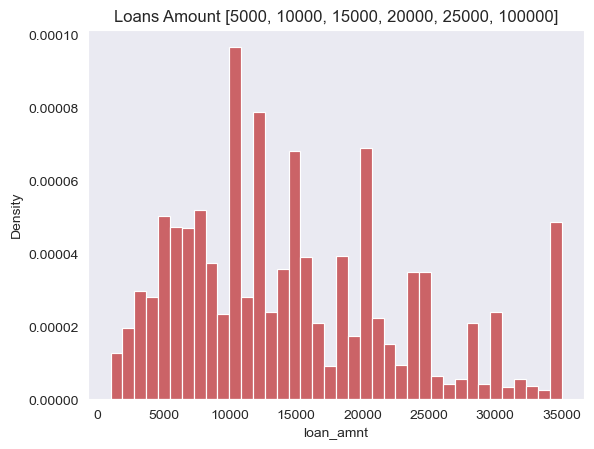

In [32]:
sns.histplot(data=df,x="loan_amnt",stat="density").set(title=f'Loans Amount {bins}')

[Text(0.5, 1.0, 'Loans Amount [5000, 10000, 15000, 20000, 25000, 100000]')]

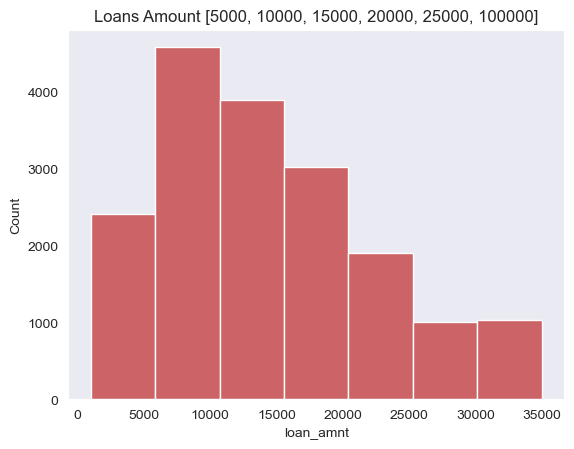

In [33]:
binwidth = 5000
sns.histplot(data=df,x="loan_amnt",binwidth=binwidth).set(title=f'Loans Amount {bins}')

[Text(0.5, 1.0, 'Loans Amount ')]

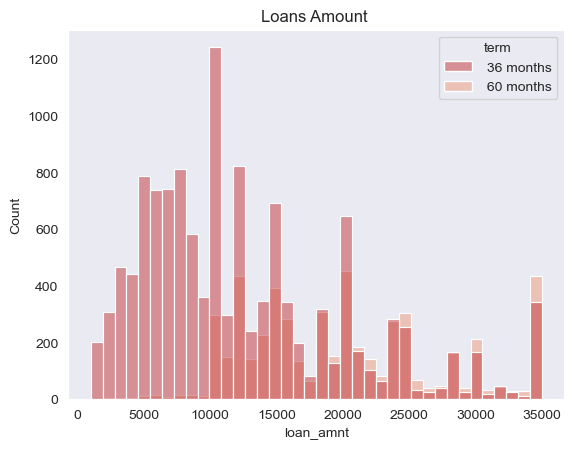

In [34]:
sns.histplot(data=df,x="loan_amnt",hue="term").set(title=f'Loans Amount ')

[Text(0.5, 1.0, 'Loans Amount ')]

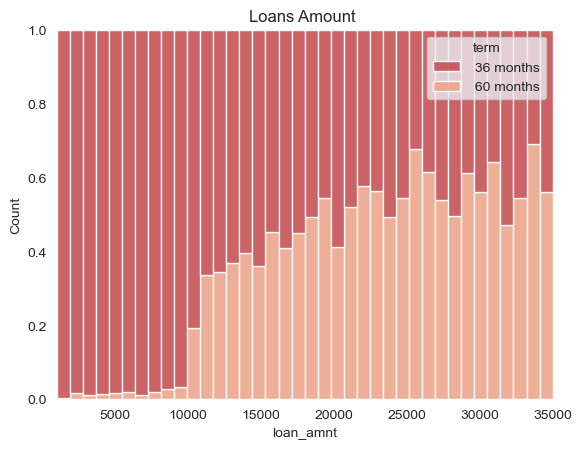

In [35]:
sns.histplot(data=df,x="loan_amnt",hue="term",multiple="fill").set(title=f'Loans Amount ')

## Heat Map

<Axes: xlabel='term', ylabel='home_ownership'>

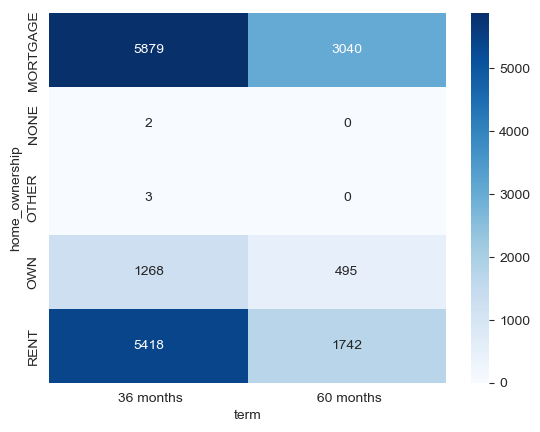

In [38]:
heatmap_data = df.pivot_table(index='home_ownership', columns='term', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')


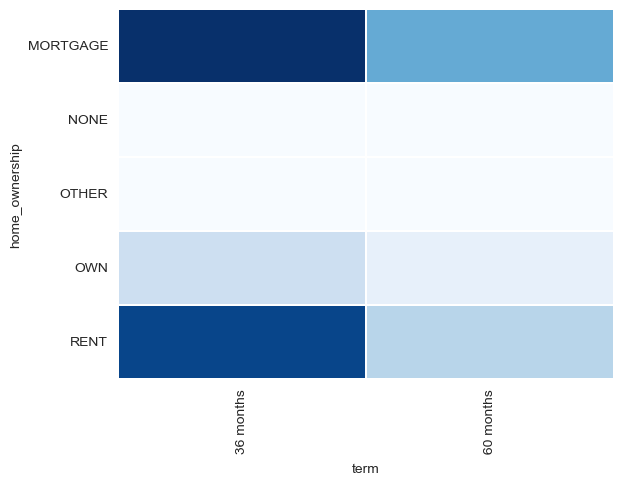

<Figure size 640x480 with 0 Axes>

In [39]:
ct = pd.crosstab(df["home_ownership"], df["term"])

sns.heatmap(ct, cbar=False, cmap="Blues", linewidths=.3)

plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Show the plot
plt.show()
plt.clf()

## Correlation

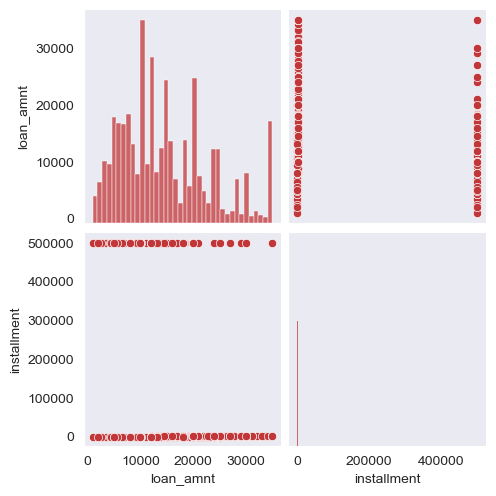

In [40]:
corr_df = df[['loan_amnt','installment']]
sns.pairplot(corr_df)

# Facet Grid

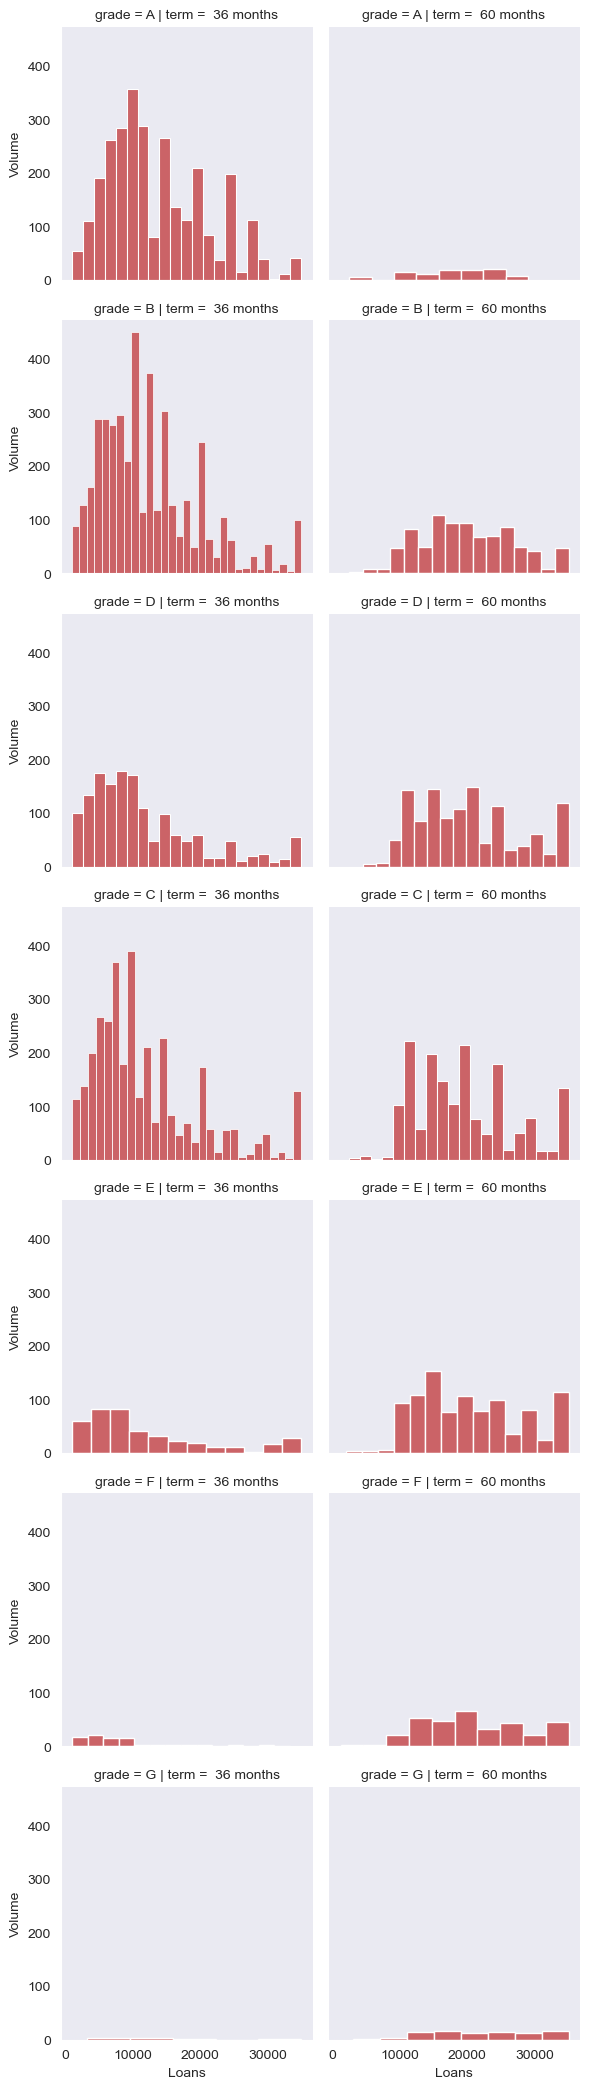

In [41]:
fg = sns.FacetGrid(df,col="term",row="grade")
fg.map(sns.histplot,"loan_amnt")
fg.set_axis_labels("Loans","Volume")
